# Covered here

* [Finer points first](#Finer-points-first)
* [Vectors](#Vectors)
* [Matrices](#Matrices)
* [Eigenvalues and eigenvectors](#Eigenvalues-and-eigenvectors)
* [Singular value decomposition](#Singular-value-decomposition)
* [Principal component analysis](#Principal-component-analysis)

# References & resources

* [Matrix Arithmetics under NumPy and Python](https://www.python-course.eu/matrix_arithmetic.php)
* [MIT OpenCourseware: Linear Algebra](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
* [SciPy `linalg`](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
* [NumPy `linalg`](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)
 * `scipy.linalg` contains all the functions in `numpy.linalg`, plus some other more advanced ones not contained in `numpy.linalg`.
* [NumPy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
* Harvey Mudd College: [Matrix Algebra](https://www.math.hmc.edu/calculus/tutorials/matrixalgebra/)
* Abdi & Williams: [Principal component analysis](http://www.utdallas.edu/~herve/abdi-awPCA2010.pdf), Aug 2010

# Finer points first

NumPy's treatment of linear algebra operations can be a bit confusing and at times seem to conflict with textbook convention.  **That is discussed in more detail [here](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).**

One important point is that, when dealing with _vectors_, you should generally **treat and define vectors as being 1-dimensional, having shape _(n,)_ rather than _(n,1)_ or _(1,n)_.**  While this may conflict with teaching (such as from Strang - Chapter 1.1), it is okay to think of vectors as having _length_ rather than needing to think of them as having _shape_.

For instance, any textbook will tell you that this is a defined operation:

$\begin{bmatrix}4 \\ 2 \end{bmatrix} \cdot \begin{bmatrix}-1 \\ 2 \end{bmatrix} = -4 + 4=0$

But using NumPy's `matrix` class will result in a value error because the "vectors" will always be 2d and the trailing dimension of the first does not equal to the starting dimension of the second:

In [72]:
import numpy as np
from numpy import linalg

# Both shape (2,1)
a = np.matrix('4 2').T
b = np.matrix('-1 2').T
print(a * b)  # Equiv to a.dot(b)

ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

The solution, somewhat unintuitively, is to just use `ndarrays`:

In [73]:
a = np.array([4, 2])
b = np.array([-1, 2])
print(a.dot(b))

0


Note that the transpose of a one-dimensional `ndarray` does nothing.  Also note that this construction would be invalid (similar to the error with `matrix` objects above:

In [74]:
print(a.reshape(-1,1).dot(a.reshape(-1,1)))

ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

Independent from this, **use of `matrix` in NumPy is discouraged**.  The only things that `matrix` adds are:
* Alternate construction syntax: `np.matrix('1 2 3')` or `np.matrix('1 2; 3 4')`, similar to MATLAB.
* `.H`, `.I`, and `.A` attributes, which return the conjugate transpose, inverse, and `asarray()` of the matrix, respectively.
* For `matrix`, one-dimensional arrays are always upconverted to 1xN or Nx1 matrices (row or column vectors).  (So, `matrix` is always 2d.
* For matrix, ‘``*``’ means matrix multiplication, and the `multiply()` function is used for element-wise multiplication.

# Vectors

A vector is a one-dimensional array of numbers.

## Linear combination

$cv+dw = c\begin{bmatrix}1 \\ 1 \end{bmatrix} + d\begin{bmatrix}2 \\ 3 \end{bmatrix}$

$v+w = \begin{bmatrix}1 \\ 1 \end{bmatrix} + \begin{bmatrix}2 \\ 3 \end{bmatrix} = \begin{bmatrix}3 \\ 4 \end{bmatrix}$ is the combination with $c=d=1$.

In [75]:
v = np.array([1, 1])
w = np.array([2, 3])
c = d = 1
print(c*v + d*w)

[3 4]


## Vector addition

The sum of $cv$ and $dw$ is a linear combination of $v$ and $w$.

$v=\begin{bmatrix}v_1 \\ v_2 \end{bmatrix}$ and $w=\begin{bmatrix}w_1 \\ w_2 \end{bmatrix}$ add to $v+w=\begin{bmatrix}v_1 + w_1 \\ v_2 +w_2\end{bmatrix}$

In [76]:
print(v + w)

[3 4]


## Scalar multiplication

Numbers _c_ when used in linear algebra are referred to as _scalars_.

$2v=\begin{bmatrix}2v_1 \\ 2v_2 \end{bmatrix}$ and $-v=\begin{bmatrix}-v_1 \\ -v_2 \end{bmatrix}$

In [77]:
print(2 * v)
print(-v)

[2 2]
[-1 -1]


Note that the sum of a vector and its negation is the **zero vector.**  This is **0**, which is not the same as the number zero.  The zero vector has components all equal to 0.

In [78]:
print(v + (-v))

[0 0]


## Dot product of vectors

The **dot product of two vectors** is an algebraic operation that **takes two coordinate vectors of equal size and returns a single number--a scalar**. The result is calculated by **multiplying corresponding entries and adding up those products**.  This is analogous to a `sumproduct` in Excel.

$v \cdot w = \sum{v_i w_i}$

In [79]:
x = np.array([1, 2, 3])
y = np.array([-7, 8, 9])
print(x.dot(y))  # Alternate: np.dot(x,y)
# print(np.sum(x * y))  # A `sumproduct`

36


Note that perpendicular vectors (the angle between them is 90 degrees) will yield a zero scalar as a result.

In [80]:
v = np.array([4, 2])
w = np.array([-1, 2])
print(v.dot(w))  # (4)(-1) + (2)(2) = -4 + 4

0


## Length of a vector

The **length** $||v||$ of a vector $v$ is the square root of $v\cdot v$, the dot product of the vector with itself.  So, the dot proudct $v\cdot v$ gives the _length of v squared_.  This is also called $norm(v)$.

In [81]:
v = np.array([1, 2, 3])
print(v.dot(v))  # ||v|| ^ 2
assert np.sqrt(v.dot(v)) == linalg.norm(v)

14


Here the norm is just the **ordinary length of the arrow that represents the vector.**  The derivation of the length then comes from the Pythagoras formula, $a^2+b^2=c^2$, where the arrow is $c$.  This can be extended to three-dimensional vectors.

![pythag.PNG](./imgs/pythag.PNG)

## Unit vectors

A unit vector is a vector whose length equals one.  That implies $v \cdot v = 1$.

The standard unit vectors along the _x_ and _y_ axes are written **_i_** and **_j_**.

$i = \begin{bmatrix}1 \\ 0 \end{bmatrix}$ and $j = \begin{bmatrix}0 \\ 1 \end{bmatrix}$

## Geometric representation of vectors

A 2d vector $v$ can be seen as:
* Two numbers
* An array extending from the origin (0,0)
* A point in the plane relative to (0,0)

The vector v = (4, 2) is an arrow that goes up 4 units to the right and 2 units up.

![vectoradd.PNG](./imgs/vectoradd.PNG)

## Vectors in three dimensions

Vectors with three components corresponds to arrows in 3-space.  The array starts at the origin (0,0,0) where the _xyz_ axes meet.

![vector3d.PNG](./imgs/vec3d.PNG)


## Alternate representations of vectors

Note that a vector $v=\begin{bmatrix}v_1 \\ v_2 \end{bmatrix}$ may also be denoted $v=(v_1, v_2)$ or $\dot{v} = <v_1,v_2,v_3>$.

## Summary of vector operations

Vector operations work elementwise.

![vectorops.PNG](./imgs/vectorops.PNG)

# Matrices

While a vector is a 1-dimensional array of numbers, a **matrix is a 2-dimensional (rectangular) array of numbers.**

An _m x n_ matrix has _m_ rows and _n_ columns.

## Matrix notation

The first row of a 2x2 matrix contains $a_{11}$ and $a_{12}$.  The second row contains $a_{21}$ and $a_{22}$.  The first index gives the row number and the second gives the column number.  An alternate notation of $a_{ij}$ is $A(i,j)$.

$a = \begin{bmatrix}a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} = \begin{bmatrix}a(1,1) & a(1,2) \\ a(2,1) & a(2,2) \end{bmatrix}$

## Linear combinations of matrices

The three vectors in this example are $u$, $v$, and $w$.

$u=\begin{bmatrix}1 \\ -1 \\ 0 \end{bmatrix}, v=\begin{bmatrix}0 \\ 1 \\ -1 \end{bmatrix}, w=\begin{bmatrix}0 \\ 0 \\ 1 \end{bmatrix}$

Their linear combinations in three-dimensional space are $cu + dv + ew$:

$c\begin{bmatrix}1 \\ -1 \\ 0 \end{bmatrix}+ d\begin{bmatrix}0 \\ 1 \\ -1 \end{bmatrix}+e\begin{bmatrix}0 \\ 0 \\ 1 \end{bmatrix}=\begin{bmatrix}1*c+0*d+0*e \\ -1*c+1*d+0*e \\ 0*c-1*d+1*d \end{bmatrix}=\begin{bmatrix}c \\ d-c \\ e-d \end{bmatrix}$

You can then rewrite that combination using a matrix instead of 3 scalars:

$\begin{bmatrix}1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix}\begin{bmatrix}c \\ d \\ e \end{bmatrix}=\begin{bmatrix}c \\ d-c \\ e-d \end{bmatrix}$

This is **a matrix times a vector** and leads us to the definition of dot products for matrices.

## Using matrices to solve linear equations/systems

The central problem of linear algebra is to solve a system of linear equations.  For example, take two equations with two unknowns.

$$x - 2y = 1$$

$$3x + 2y = 11$$

One way to solve is the find visually the point where the lines intersect.

![intersect.PNG](./imgs/intersect.PNG)

The linear algebra way is to recognize the same linear system as a vector equation.  Instead of numbers we use vectors, separating the original system into its columns and rows:

$$x\begin{bmatrix}1 \\ 3 \end{bmatrix}+y\begin{bmatrix}-2 \\ 2 \end{bmatrix}=\begin{bmatrix}1 \\ 11 \end{bmatrix}=b$$

That is, there is some scalar _x_ and some scalar _y_ (coefficients) that will satisfy both equations.  The next step is to rewrite using a _coefficient matrix_:

$$\begin{bmatrix}1 & -2 \\ 3 & 2 \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}1 \\ 11 \end{bmatrix}$$

In [82]:
A = np.array([[1, -2],
              [3,  2]])
x = np.array([3, 1])
b = np.array([1, 11])
print(A.dot(x))

[ 1 11]


The formal solution is to use a matrix inverse:

$x = A^{-1} \cdot b$

In NumPy/SciPy, solving linear systems of equations is straightforward using `linalg.solve`.

Notation: `scipy.linalg.solve(a, b)` --> Solve the equation `a x = b` for `x`.  This is also faster and numerically stable.

In [83]:
print(linalg.solve(A, b))

[ 3.  1.]


## The identity and inverse matrix

An **identity matrix**, denoted **I**, is a \*square\* matrix consisting of ones down the main diagonal.

In [84]:
print(np.identity(4, dtype=np.int16))

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


The **inverse** of a matrix **A** is the matrix **B** such that $A \cdot B = I$.  Usually **B** is denoted $B = A ^ {-1}$. In SciPy, the matrix inverse of the Numpy `ndarray`, `A`, is obtained using `linalg.inv(A)` , or using `A.`I if `A` is a `matrix`.

**Not all matrices have inverses.**  Only square matrices can have inverses.

In [85]:
a = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])
print(linalg.inv(a))
print('\n')
print(np.mat(a).I)

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


Note above that [`np.mat`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mat.html) interprets the input as a matrix.

In [86]:
a.dot(linalg.inv(a)).round(1)  # Double-check result is identity matrix

array([[ 1.,  0., -0.],
       [-0.,  1.,  0.],
       [-0.,  0.,  1.]])

## Matrix multiplication

Note that a dot product and matrix multiplication are not the same thing.  Matrix multiplication is essentially a table of dot products for pairs of vectors making up the entries of two matrices.  Matrix multiplication between _A_ and _B_ is defined _iff_ the **number of columns in the first matrix equals the number of rows in the second.**  The entry of row $i$ and column $j$ in $AB$ is $(row \ i \ of \ A) \cdot (column \ j \ of \ B)$.

$(m \times n)(n \times p) = (m \times p)$

![dotprod3.PNG](./imgs/dotprod3.PNG)

![dotprod2.PNG](./imgs/dotprod2.PNG)

![matmult.PNG](./imgs/matmult.PNG)

Note that matrix multiplication can be expressed as "multiplication by rows" or "multiplication by columns":

**Multiplication by rows**: Multiply each row of $A$ by the column vector $x$:

$Ax = \begin{bmatrix}(row \ 1) \cdot x \\ (row \ 2) \cdot x \\ (row \ 3) \cdot x \end{bmatrix}$

**Multiplication by columns**: $Ax$ is a combination of column vectors,

$Ax = x(column \ 1) + y(column \ 2) + z(column 3)$

In [87]:
A = np.array([[1,  2, 3],
              [2,  5, 2],
              [6, -3, 1]])
x = np.array([0, 0, 2])
print(A.dot(x))

[6 4 2]


In [88]:
# Multiplication by rows
for row in A:
    print(row.dot(x))

6
4
2


In [89]:
# Multiplication by columns
r = x[0] * A[:, 0]
s = x[1] * A[:, 1]
t = x[2] * A[:, 2]
print(r + s + t)

[6 4 2]


The confusing thing here is that **`np.dot` is also smart enough to refer to matrix multiplication for two 2d arrays**.  From the docstring,

 > For 2-D arrays it is equivalent to matrix multiplication, and for 1-D arrays to inner product of vectors (without complex conjugation).

In [90]:
a = np.arange(1,9, dtype=np.float64).reshape(4,2)
b = np.linspace(10, 60, num=6).reshape(2,3)
print(a)
print('\n')
print(b)
print('\n')
print(a.dot(b))

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]]


[[ 10.  20.  30.]
 [ 40.  50.  60.]]


[[  90.  120.  150.]
 [ 190.  260.  330.]
 [ 290.  400.  510.]
 [ 390.  540.  690.]]


Above (yellow), the first row of `a` is multiplied by the second column of `b`, and the sum becomes element (1,2) of the result.

In [91]:
print(a[0] * b[:,1])
print(np.sum(a[0] * b[:,1]))

[  20.  100.]
120.0


[`numpy.matmul`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) is also used for matrix multiplication but has more complex behavior depending on the shape of the arguments.

> - If both arguments are 2-D they are multiplied like conventional matrices.
> - If either argument is N-D, N > 2, it is treated as a stack of matrices residing in the last two indexes and broadcast accordingly.
> - If the first argument is 1-D, it is promoted to a matrix by prepending a 1 to its dimensions. After matrix multiplication the prepended 1 is removed.
> - If the second argument is 1-D, it is promoted to a matrix by appending a 1 to its dimensions. After matrix multiplication the appended 1 is removed.

## Matrix addition, subtraction & scalar multiplication

Matrices can be added or subtracted if their shapes are the same.  In this case, just add or subtract elementwise corresponding entries.  Like vectors, matrices can be multiplied by an constant _c_.

Addition: $B+C=[b_{ij}+c_{ij}]$

Subtraction: $B-C=[b_{ij}-c_{ij}]$

Scalar multiplication: $cA = [cA_{ij}]$

In [92]:
a = np.array([[1, 2],
              [3, 4],
              [0, 0]])  # Unnecessary here: a = np.matrix('1 2; 3 4; 0 0')
b = np.array([[2, 2],
              [4, 4],
              [9, 9]])
print(a + b)
print()
print(a - b)
print()
print(2*a)

[[3 4]
 [7 8]
 [9 9]]

[[-1  0]
 [-1  0]
 [-9 -9]]

[[2 4]
 [6 8]
 [0 0]]


## Common laws for matrix operations

Addition laws:
* Commutative law: $A+B=B+A$
* Distributive law: $c(A+B)=cA+cB$
* Associative law: $A+(B+C)=(A+B)+C$

For multiplication, the commutive "law" is _usually broken_, $AB \ne BA$.

## Dividing matrices

The [rule](#Matrix-multiplication) mentioned above does not apply for division of one matrix by another:

In [93]:
print(a)
print('\n')
print(b)
print(a / b)

[[1 2]
 [3 4]
 [0 0]]


[[2 2]
 [4 4]
 [9 9]]
[[ 0.5   1.  ]
 [ 0.75  1.  ]
 [ 0.    0.  ]]


The fix is to multiplly by the inverse of the divisor, using the logic that 10/2 is equivalent to $10 / 2^{-1}$.  However, note that this requires the divisor to have a defined inverse, which is not true for all matrices.

In [94]:
a.dot(linalg.inv(b))  # Not going to work here...

LinAlgError: Last 2 dimensions of the array must be square

[UNFINISHED]

## Other terminology

### Square matrix

A square matrix has dimensions _n x n_.

### Diagonal & trace

For an _n x n_ square matrix $A$, the elements $a_{11}, a_{22}, ..., a_{nn}$ form the **main diagonal** of the matrix. The sum $\sum a_{kk}$  of the elements on the main diagonal of $A$ is called the **trace** of $A$.

In [95]:
B = np.array([[6, 9],
              [-4, -6]])
print(np.trace(B))  # 6 + (-6)

0


### Transpose

The matrix $A^T=[a_{ji}]$ formed by **interchanging the rows and columns** of $A$ is called the **transpose** of $A$. 

### Symmetry

If $A^T=A$, the matrix $A$ is **symmetric.**

### Determinant

How do we know that $B=\begin{bmatrix}6 & 9 \\ -4 & -6 \end{bmatrix}$ does not have an inverse?

The determinant of $A$, $detA$, is a number with the **property that $A$ is invertible if and only if $detA=0$.**

For a 2x2 matrix $A=\begin{bmatrix}-a & b \\ c & d \end{bmatrix}$, $detA=ad-bc$.

The manual computation for 3x3 or higher-dimension matrices is significantly more complicated.  See [Determinant of a Matrix](https://www.math.hmc.edu/calculus/tutorials/matrixalgebra/).

In [96]:
print(linalg.det(B))
a, b, c, d = B.flatten()
print(a*d-b*c)  # (6)(−6)−(9)(−4)
print(np.allclose(linalg.det(B), a*d-b*c))

-1.99840144433e-15
0
True


# Eigenvalues and eigenvectors

> **See also**: Strang, _Intro to Linear Algebra 4th ed._, Chapter 6 - Eigenvalues & Eigenvectors

The eigenvalue-eigenvector problem as well as [singular value decomposition](#Singular-value-decomposition) are forms of **matrix decomposition**--breaking down a matrix using other representations.

In one popular form, the **eigenvalue-eigenvector problem** is to find:
- for some _square_ matrix $A$,
- scalars $λ$,
- and corresponding vectors $v$

such that:

$$A \cdot v = \lambda \cdot v$$

Take a square matrix `a`:

In [97]:
a = np.array([[.8, .3],
              [.2, .7]])

# Note that the power of a matrix is defined 
#     as the **matrix product of n copies of A**.
print(linalg.matrix_power(a, 3))
print()
print(linalg.matrix_power(a, 100))

[[ 0.65   0.525]
 [ 0.35   0.475]]

[[ 0.6  0.6]
 [ 0.4  0.4]]


Above, we could find $A^{100}$ by using the _eigenvalues_ of A, as an alternative to multiplying 100 matrices.  Eigenvalues are a way to see into the "heart" of a matrix.

To explain eigenvalues, first understand eigenvectors.
* Almost all vectors change direction when they are multipled by $A$.
* Certain exceptions are in the same direction as $Ax$.  Those are the "eigenvectors."
* **Multiply an eigenvector $x$ by $A$, and the vector $Ax$ is a number $\lambda$ times the original $x$.**
* **In $A \cdot v = \lambda \cdot v$, $\lambda$ is the eigenvalue of $A$, and $v$ is the eigenvector.**

The eigenvalue $\lambda$ tells us whether the special vector $x$ is stretched, strunk, reversed, or left unchanged when it is multiplied by $A$.  $\lambda$ could be zero; then $Ax=0x$ means that this eigenvector $x$ is in the nullspace.

Matrix eigenvalues [in NumPy](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html#matrix-eigenvalues):
* `linalg.eig` --> Compute the eigenvalues and right eigenvectors of a square array.
* `linalg.eigh` --> Return the eigenvalues and eigenvectors of a Hermitian or symmetric matrix.
* `linalg.eigvals` --> Compute the eigenvalues of a general matrix.
* `linalg.eigvalsh` --> Compute the eigenvalues of a Hermitian or real symmetric matrix.


In [98]:
eigvals, eigvecs = linalg.eig(a)

In [99]:
print(eigvals)  # lambda

[ 1.   0.5]


In [100]:
print(eigvecs)  # v

[[ 0.8321 -0.7071]
 [ 0.5547  0.7071]]


Above we established the relationship:

$$A \cdot v = \lambda \cdot v$$

Let's check to see if this holds:

In [101]:
assert np.array_equal(a.dot(eigvecs), eigvals.dot(eigvecs))

AssertionError: 

Apparently not: in fact we have:

In [102]:
a.dot(eigvecs)

array([[ 0.8321, -0.3536],
       [ 0.5547,  0.3536]])

In [103]:
eigvals.dot(eigvecs)

array([ 1.1094, -0.3536])

Why is this?  The [eigenvalues returned by `linalg.eig` are columns vectors](https://stackoverflow.com/a/18771667/7954504), so you need to iterate over the transpose of the eigenvectors (since iteration over a 2D array returns row vectors by default).  Let's refresh our memory on what our returned matrices are:

In [104]:
print(a)

[[ 0.8  0.3]
 [ 0.2  0.7]]


In [105]:
print(eigvecs)

[[ 0.8321 -0.7071]
 [ 0.5547  0.7071]]


In [106]:
print(eigvecs)

[[ 0.8321 -0.7071]
 [ 0.5547  0.7071]]


In [107]:
print(eigvecs.T)

[[ 0.8321  0.5547]
 [-0.7071  0.7071]]


![laeig.PNG](./imgs/laeig.PNG)


In [108]:
for val, vec in zip(eigvals, eigvecs.T):
    assert np.allclose(np.dot(a, vec), val * vec)

So to be correct in terminology here, the matrix `A` has two eigenvalues ($\lambda = 1.0$ and $\lambda = 0.5$). 

There is one more source of confusion:

> `linalg.eig`: returns a tuple of (w,v) or (eigenvalues, eigenvectors),  where **the eigenvectors are normalized (unit “length”) eigenvectors**, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.  

We found above that the _unit length_ eigenvectors are:

In [109]:
ev1, ev2 = eigvecs.T
print(ev1)
print()
print(ev2)

[ 0.8321  0.5547]

[-0.7071  0.7071]


In [110]:
# Check that both are unit length:
assert linalg.norm(ev1) == linalg.norm(ev2) == 1.

But a textbook might give the result as $ev1 = [0.6, 0.4]$ and $ev2 = [1, -1]$, found manually using matrix determinants.

**Both solutions are correct.** It is the direction, not magnitude, of the eigenvectors that matters, in this case.

# Singular value decomposition

Resources:
* yhat: [What is Singular Value Decomposition?](http://blog.yhat.com/posts/singular-value-decomposition.html)
* [numpy.linalg.svd](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.linalg.svd.html)
* [scipy.linalg.svd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html)
* Abdi & Williams: [Principal component analysis](http://www.utdallas.edu/~herve/abdi-awPCA2010.pdf), Aug 2010

Singular Value Decomposition (SVD) can be thought of as an **extension of the eigenvalue problem** to matrices that are not square. (It extends to _m x n_ matrices.)

SVD says that a matrix **X** can be decomposed into

$$X = U \Sigma V^T$$ 

The convention with `linalg.svd` is to return $U$, $\Sigma$, and $V^T$ (or technically $Vh$, the Hermetian transpose).  $\Sigma$ is a 1-d array of the singular values of $A$.  A check:

In [111]:
u, s, vh = linalg.svd(a, full_matrices=False)  # see docs; False follows Abdi/Williams paper
v = vh.T
print(u.dot(np.diag(s)).dot(vh))  # or u.dot(np.diag(s)).dot(v.T))
assert np.allclose(a, u.dot(np.diag(s)).dot(vh))

[[ 0.8  0.3]
 [ 0.2  0.7]]


To repeat an important point: the `v` returned by `linalg.svd` is really $V^T$, the [Hermetian transpose](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/eigs.pdf).

Note that if you were to pass a NumPy `matrix` to `svd`, the results would also be `matrices`:

In [112]:
u, s, vh = linalg.svd(np.mat(a), full_matrices=False)
print(u * np.diag(s) * vh)  # Now you can use * for matrix multiplication

[[ 0.8  0.3]
 [ 0.2  0.7]]


# Principal component analysis

## Mathematical background

PCA is an _unsupervised learning_ technique used to decompose a multivariate dataset in a set of successive orthogonal components that **explain a maximum amount of the variance**.

PCA analyzes a data table representing observations described by several dependent variables, which are, in general, inter-correlated. Its goal is to extract the important information from the data table and to express this information as a set of new
orthogonal variables called **principal components**, which are linear combinations of the original variables.

An important feature of PCA is that each principal component is completely _orthogonal_ (in this sense, statistically independent) from each of the other components.

The data table analyzed by PCA is a matrix **X** of shape _I x J_ (_I_ observations or samples and _J_ variables or features).  The [rank](http://stattrek.com/matrix-algebra/matrix-rank.aspx) of **X** is $L ≤ min(I,J)$.

It is common to first standardize each column of the array, i.e. center the columns of **X** so that the mean of each is equal to 0 and standardize each variable to unit norm:

$$\frac{x_i-\mu}{\sigma}$$

## Underlying algebra

Specifically, with $X = U \Sigma V$, the _I × L_ matrix of factor scores, denoted **F**, is obtained as:

$$F = U \Sigma$$

The matrix **V** gives the coefficients of the linear combinations used to compute the factors scores.

## Vocab

PCA utilizes singular value decomposition.  See the sections above if you have not read them yet.

The **eigenvectors** are the resulting principal components.  These are the lines along which particular dimensions would be plotted if graphed.

The **eigenvalue** associated to a component is equal to the sum of the squared factor scores for this component. 
- Therefore, the importance of an observation for a component can be obtained by the ratio of the squared factor score of this observation by the eigenvalue associated with that component. 
- This ratio is called the **contribution** of the observation to the component.
    - The value of a contribution is between 0 and 1 and, for a given component, the sum of the contributions of all observations is equal to 1. 
    - The larger the value of the contribution, the more the observation contributes to the component.

So, while the eigenvector describes a line or dimension, the eigenvalue represents the amount of variance described or captured by the eigenvector.  An example output table from Abdi/Williams:

![](./imgs/eigens.PNG)

In the PCA framework, this correlation is called a loading. Note that the sum of the squared coefficients of correlation between a variable and all the components is equal to 1. As a consequence, the squared loadings are easier to interpret than the loadings (because the squared loadings give the proportion of the variance of the variables explained by the components).

## Solving manually with SVD

Before using `sklearn`, let's attempt to solve manually.  There will be some slight discrepancies in output which we'll cover later.

We will work with a set of interest rates for 5-, 10-, and 30-year US government bonds.

In [113]:
import pandas_datareader as pdr
from sklearn.preprocessing import scale
symbols = ['DGS5', 'DGS10', 'DGS30']
start, end = '2017-01-01', '2017-02-01'
rates = scale(pdr.DataReader(symbols, 'fred', start, end)
              .pct_change().dropna())
rates.shape

(20, 3)

Now `v`'s transpose is our matrix of components (again, with features as columns and components on the index).

In [114]:
u, s, Vh = linalg.svd(rates, full_matrices=False)
print(Vh)

[[ 0.5837  0.5861  0.5619]
 [ 0.4333  0.3605 -0.826 ]
 [-0.6867  0.7256 -0.0436]]


## Solving with sklearn

`sklearn`'s PCA [uses](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/pca.py#L399) SVD internally.

In [115]:
from sklearn.decomposition import PCA
pca = PCA().fit(rates)
print(pca.components_)

[[-0.5837 -0.5861 -0.5619]
 [-0.4333 -0.3605  0.826 ]
 [-0.6867  0.7256 -0.0436]]


## Enforcing deterministic output

Let's compare our results above:

In [116]:
np.equal(Vh, pca.components_)

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True]], dtype=bool)

We see that **some, but not all** results are equal.  Furthermore, it looks like it's just their signs that differ:

In [117]:
np.allclose(np.abs(Vh), np.abs(pca.components_))

True

What's going on here?  There's an [inconspicuous function, `svd_flip`](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/pca.py#L418) in the source for PCA, the purpose of which is to

> flip eigenvectors' sign to enforce deterministic output.

(`svd_flip` is in turn defined [here](https://github.com/scikit-learn/scikit-learn/blob/a24c8b464d094d2c468a16ea9f8bf8d42d949f84/sklearn/utils/extmath.py#L500).)


**Deterministic functions** are those that, given a certain input, always produce the same output value.

The issue here is that this property does not hold true for the underlying SVD solver in `sklearn`.  In other words, [SVD is unique up to a change in sign in pairs of left and right singular vectors](https://stackoverflow.com/a/44847053/7954504).  

> Since the PCA is just a SVD of X (or an eigenvalue decomposition of $X^\top X$), there is no guarantee that it does not return different results on the same X every time it is performed. Understandably, the `sklearn` implementation wants to avoid this: they guarantee that the left and right singular vectors returned (stored in U and V) are always the same, by imposing (which is arbitrary) that the largest coefficient of $u_i$ in absolute value is positive.

An alternate implementation that allows the user to choose from a "u" or "v"-based decision can be found [here](https://github.com/bsolomon1124/pyfinance/blob/master/pyfinance/general.py#L573).

## How many components?

1. A first procedure is to plot the eigenvalues according to their size (the so called "scree,") and to see if there is a point in this graph (often called an ‘elbow’) such that the slope of the graph goes from ‘steep’ to ‘‘flat’’ and to keep only the components which are before the elbow. This procedure, somewhat subjective, is called the scree or elbow test.

2. Another standard tradition is to keep only the components whose eigenvalue is larger than the average.  For a correlation PCA, this rule boils down to the standard advice to keep only the eigenvalues larger than 1.0 (**Kaiser's Criterion**) or larger than 0.70 (**Jolliffe's Criterion**).

## Example 2

In [118]:
# Modified from Müller/Guido - Intro to ML with Python - Chapter 3

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

# Scale to unit variance
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# Specify that we want to keep only 2 components
#     to further reduce dimensionality.
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Our resulting components have the features on the column axis (perhaps a bit unintuitive to pandas users; sometimes the features are presented as the index and the components as the columns).

In [119]:
pca.components_.shape

(2, 30)

Text(0,0.5,'Principal components')

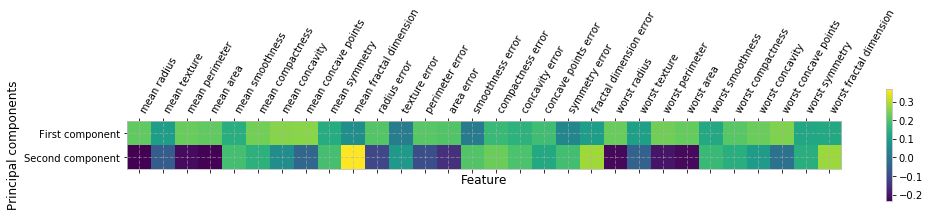

In [120]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Here's the data in (transposed) tabular form:

In [121]:
import pandas as pd
pd.DataFrame(pca.components_.T, index=cancer.feature_names,
             columns=["First component", "Second component"])

,First component,Second component
mean radius,0.2189,-0.2339
mean texture,0.1037,-0.0597
mean perimeter,0.2275,-0.2152
mean area,0.2210,-0.2311
mean smoothness,0.1426,0.1861
mean compactness,0.2393,0.1519
mean concavity,0.2584,0.0602
mean concave points,0.2609,-0.0348
mean symmetry,0.1382,0.1903
mean fractal dimension,0.0644,0.3666


# Other

## Varimax rotation

Two main types of rotation are used: 
* _orthogonal_ when the new axes are also orthogonal to each other, and 
* _oblique_ when the new axes are not required to be orthogonal. 

Because the rotations are always performed in a subspace, the new axes will always explain less inertia than the original components (which are computed to be optimal).

**Varimax rotation** is the most popular rotation method.  For varimax a simple solution means that each component has a small
number of large loadings and a large number of zero (or small) loadings.

Formally, varimax searches for a linear combination of the original factors such that the variance of the squared loadings is maximized, which amounts to maximizing

$$v = \sum{q_{j, \lambda}^2 - q_{\lambda}^2}$$

with $q_{j, \lambda}^2$ being the squared loading of the _j-th_ variable of matrix **Q** on component $\lambda$ and $q_{\lambda}^2$ being the mean of the squared loadings.

## KMO

Kaiser-Meyer-Olkin (KMO) statistic - a measure of sampling adequacy, used to indicate whether variables are "correlated enough" to be suited for PCA.

$$KMO = \frac{\rho^2}{\rho_p^2}$$

where $\rho^2$ is the full correlation between variables and $\rho_p^2$ is the partial correlation; $0 \leq KMO \leq 1$.

A value of 0.7 is typically seen as a lower threshold of acceptability for proceeding.

## Relative diversification

Relative diversification - a finance term denoting the number of principal components required to explain roughly 75% of the variation in a portfolio.

In [122]:
returns = scale(pd.read_csv('input/fiveasset.csv', index_col=0, parse_dates=True)) # array
pd.DataFrame(returns).head()

,0,1,2,3,4
0,-0.8267,-0.9967,-0.2357,-0.7113,1.2454
1,-0.5466,-0.5683,0.9031,0.1361,1.1368
2,-0.1552,-0.6088,-0.3782,0.1368,-1.7223
3,1.9245,1.8312,0.4132,0.3874,-0.2118
4,1.1744,1.1054,1.3249,0.7824,1.6372


In [124]:
pca = PCA().fit(returns)

# components; see https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn
# should be similar to Rankin p. 18
comps = -1 * pca.components_.T * np.sqrt(pca.explained_variance_)
print(pd.DataFrame(comps))

        0       1       2       3       4
0  0.9136  0.2942  0.1217 -0.1569 -0.2143
1  0.9387  0.1455 -0.0042 -0.2560  0.1970
2  0.3096 -0.9370  0.1285 -0.1232 -0.0350
3  0.8418 -0.0278  0.3963  0.3721  0.0424
4  0.6778 -0.1356 -0.7091  0.1602 -0.0206


In [125]:
pca.explained_variance_

array([ 2.9797,  1.0048,  0.6912,  0.2695,  0.0882])